In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# Read the data

df = pd.read_csv(r'/Users/adwarits/Documents/Data Analytics/Movie Data Set/movies.csv')

In [3]:
# Looking at the data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
# Looking if there is a missing data or not

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [5]:
# Looking at data types

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [6]:
# Changing budget and gross data types because we don't need the digits behind the comma

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [7]:
# Creating correct year column because the current year column is different with the year in released column

df['year correct'] = df['released'].astype(str).str[:4]

In [8]:
# Sorting the columns from highest gross

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [9]:
# If you want to drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

5288                        micro_scope
3486                           i5 Films
6084                               erbp
3225                     double A Films
2707        Zucker Brothers Productions
                     ...               
3527                          120 Films
5466              10th Hole Productions
2815                 101st Street Films
3208                 1+2 Seisaku Iinkai
3832    "DIA" Productions GmbH & Co. KG
Name: company, Length: 2179, dtype: object

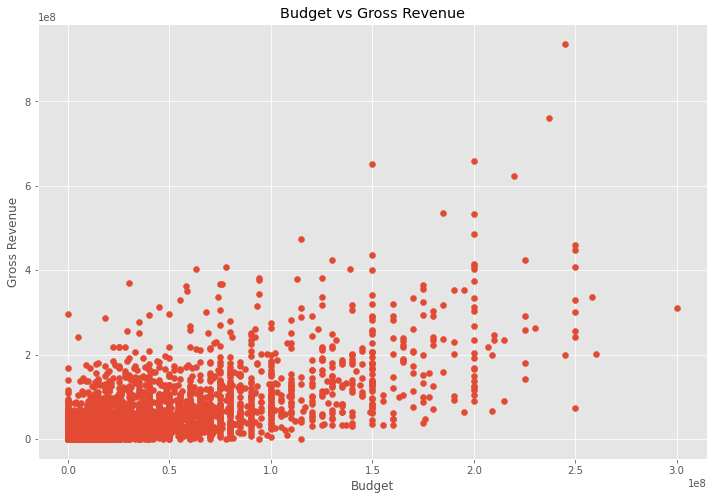

In [10]:
# Scatter plot on budget vs revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

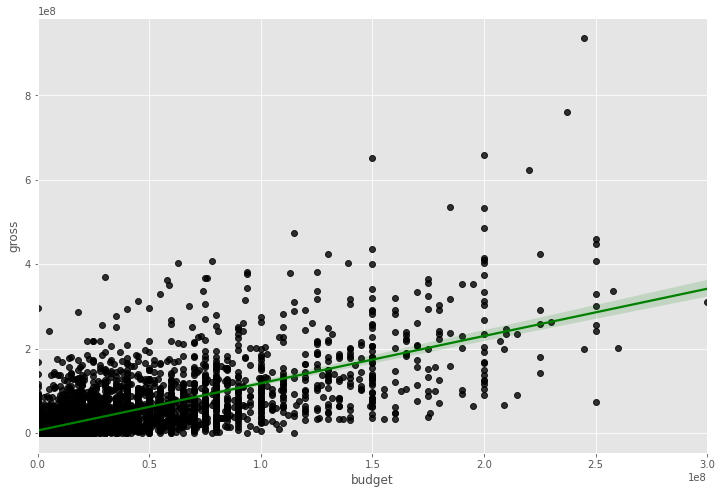

In [12]:
# Better visualization of scatter plot on budget vs revenue

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"black"}, line_kws={"color":"green"})

In [13]:
# Changing data types so that we can find a correlation

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year correct
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,29
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,23
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,11
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,29
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,2171,35,2071,0,547,2577,8,2059,104,7.2,748,16609,2981,2012,27
5699,0,1262,53,2385,4,542,5204,6,1977,89,6.2,1335,9018,2903,2011,26
6066,0,631,54,2484,5,441,2459,8,2125,106,5.7,1047,21070,2901,2013,28
2594,15000000,764,54,883,4,309,6257,7,895,84,5.7,2459,5034,217,1997,11


In [14]:
df.dtypes

budget            int64
company           int16
country            int8
director          int16
genre              int8
gross             int64
name              int16
rating             int8
released          int16
runtime           int64
score           float64
star              int16
votes             int64
writer            int16
year              int64
year correct       int8
dtype: object

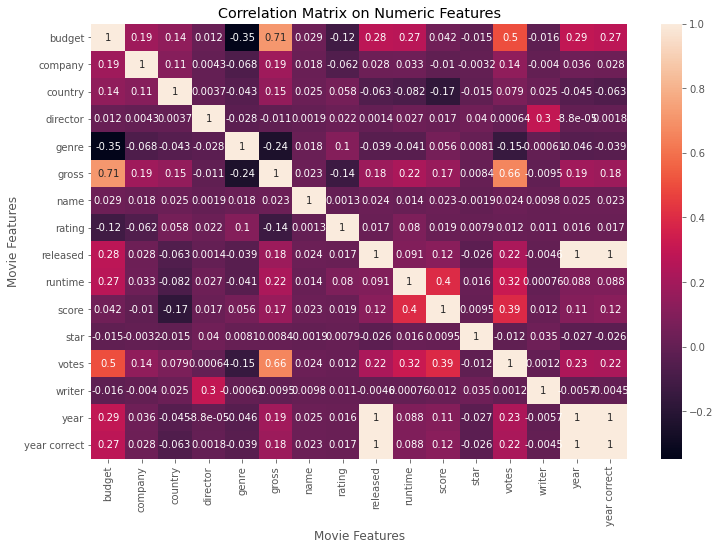

In [15]:
# Creating a correlation heatmap

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix on Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [16]:
# Looking at which features has big correlation

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget        budget          1.000000
              company         0.187205
              country         0.137635
              director        0.011602
              genre          -0.346794
                                ...   
year correct  star           -0.026050
              votes           0.220797
              writer         -0.004546
              year            0.996229
              year correct    1.000000
Length: 256, dtype: float64

In [17]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.346794
budget        genre          -0.346794
gross         genre          -0.242676
genre         gross          -0.242676
score         country        -0.174414
                                ...   
director      director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
year correct  year correct    1.000000
Length: 256, dtype: float64

In [18]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes         budget          0.503924
budget        votes           0.503924
votes         gross           0.662457
gross         votes           0.662457
              budget          0.712196
budget        gross           0.712196
released      year            0.996187
year          released        0.996187
year correct  year            0.996229
year          year correct    0.996229
year correct  released        0.999389
released      year correct    0.999389
budget        budget          1.000000
writer        writer          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company    

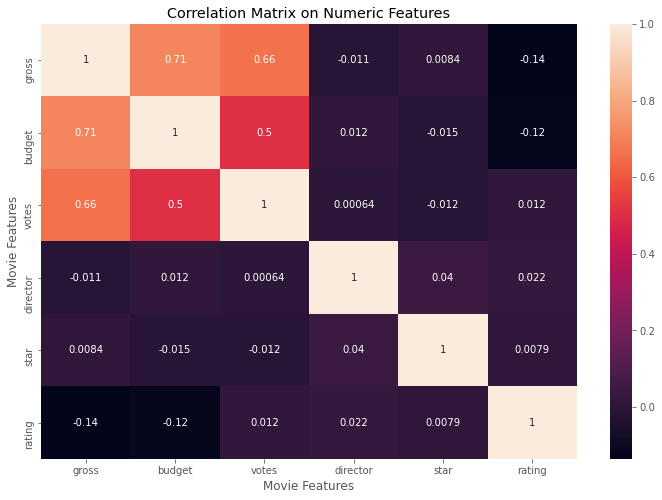

In [19]:
# The high correlation are between gross and votes and budget
# The director, star, and rating are having low correlation with gross
# Creating better heatmap visualization 

selected_column = df[['gross','budget','votes','director','star','rating']]

correlation_matrix = selected_column.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix on Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()